<IPython.core.display.Javascript object>


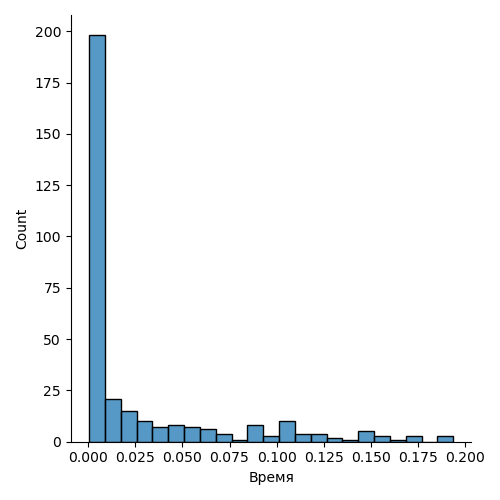

<IPython.core.display.Javascript object>


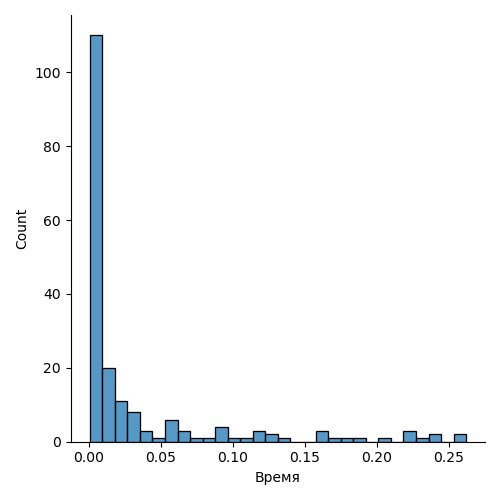

<IPython.core.display.Javascript object>


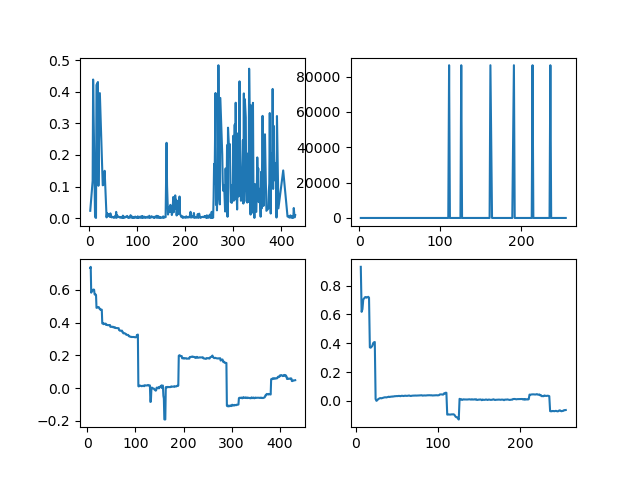

<IPython.core.display.Javascript object>


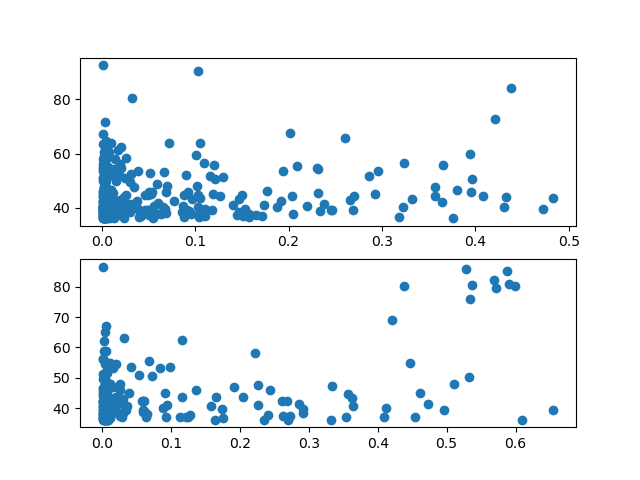

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
def delta_t(frame):
    frame.index = range(len(frame))
    duble_frame = frame.copy()
    del duble_frame[0]
    duble_frame.index = range(len(duble_frame))
    del frame[len(frame) - 1]
    delta_time = duble_frame - frame
    delta_time.index = range(1, len(frame) + 1)
    return delta_time
def corr_chart(data_01, data_02):
    change_01 = data_01.pct_change()
    change_02 = data_02.pct_change()
    return change_02.rolling(100, min_periods=5).corr(change_01)
def dis_chart(data):
    q75 = data.quantile(0.75)
    q25 = data.quantile(0.75)
    max_01 = q75 + 1.5*(q75 - q25)
    sns.displot(data.drop(data[data > max_01].index))
f = open(r'C:\Users\homepc\Documents\Pyton\aem08_02_13#01_AE.txt', 'r', encoding="utf-16")
line = f.readline()  
s = []
col = ['Дата', 'Время', 'мкс', 'Время отн', 'Номер канала', 'Тип', 'Амплитуда, АЦП', 'Амплитуда, дБ', 'Амплитуда, мкВ', 'Выбросы', 'Выбросы', 'Энергия, Дж', 'Энергия, дБ', 'Энергия MARSE', 'Длительность', 'Время нарастания', 'Число выбросов', 'Выбросы', 'Флаги']
frame = pd.DataFrame(s, index = col)
i = 0
while line != '':
    s = line.split()
    frame[i] = s
    i += 1
    line = f.readline()
f.close()
def f(x):
    date = x[0] + ' ' + x[1] + '.' + x[2]
    return datetime.strptime(date, '%d.%m.%y %H:%M:%S.%f')
time = frame.apply(f)
data = frame.T
data['Время'] = time
frame = data.drop(['Дата', 'мкс', 'Тип', 'Флаги'], axis = 1)
f = lambda x: x.seconds + x.microseconds/1000000
data_t01 = delta_t(frame[frame['Номер канала'] == '01']['Время']).apply(f)
data_t02 = delta_t(frame[frame['Номер канала'] == '02']['Время']).apply(f)
data_A01 = frame[frame['Номер канала'] == '01']['Амплитуда, дБ']
data_A02 = frame[frame['Номер канала'] == '02']['Амплитуда, дБ']
data_A01.index = range(len(data_t01) +1)
data_A02.index = range(len(data_t02) +1)
f1 = lambda x: float(x)
new_data_A01 = data_A01.apply(f1)
new_data_A02 = data_A02.apply(f1)
%matplotlib notebook
dis_chart(data_t01)
dis_chart(data_t02)
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.plot(data_t01.drop(data_t01[data_t01 > (data_t01.quantile(0.75) + 1.5*(data_t01.quantile(0.75) - data_t01.quantile(0.25)))].index))
ax2.plot(data_t02.drop(data_t02[data_t01 > (data_t02.quantile(0.75) + 1.5*(data_t02.quantile(0.75) - data_t02.quantile(0.25)))].index))
ax3.plot(corr_chart(data_t01, new_data_A01))
ax4.plot(corr_chart(data_t02, new_data_A02))
fig_1 = plt.figure()
ax1_1 = fig_1.add_subplot(2, 1, 1)
ax2_1 = fig_1.add_subplot(2, 1, 2)
new_data_A01_0 = new_data_A01.drop([0])
new_data_A02_0 = new_data_A02.drop([0])
ax1_1.scatter(data_t01.drop(data_t01[data_t01 > (data_t01.quantile(0.75) + 1.5*(data_t01.quantile(0.75) - data_t01.quantile(0.25)))].index), new_data_A01_0.drop(data_t01[data_t01 > (data_t01.quantile(0.75) + 1.5*(data_t01.quantile(0.75) - data_t01.quantile(0.25)))].index))
ax2_1.scatter(data_t02.drop(data_t02[data_t02 > (data_t02.quantile(0.75) + 1.5*(data_t02.quantile(0.75) - data_t02.quantile(0.25)))].index), new_data_A02_0.drop(data_t02[data_t02 > (data_t02.quantile(0.75) + 1.5*(data_t02.quantile(0.75) - data_t02.quantile(0.25)))].index))
